Text(0.5, 1.0, 'decision')

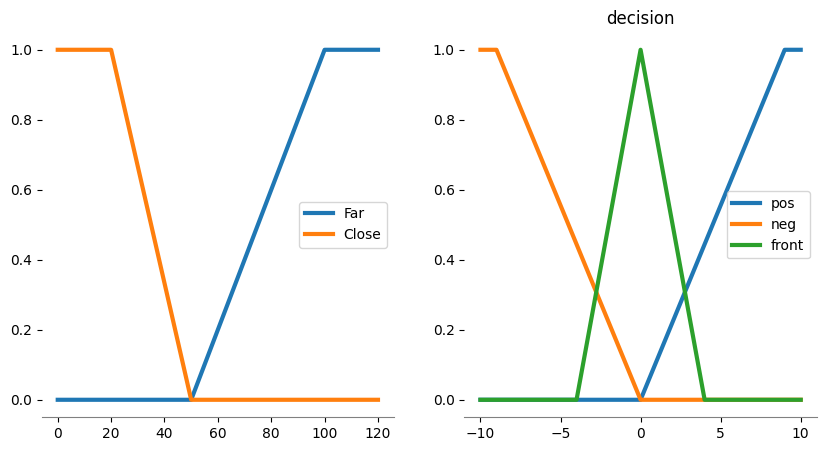

In [35]:
import matplotlib.pyplot as plt
from fuzzy_expert.variable import FuzzyVariable


variables = {
    "s1": FuzzyVariable(
        universe_range=(0, 120),
        terms={
            "Far": [(50, 0), (100, 1)],
            "Close": [(20, 1),  (50, 0)],
        },
    ),
    "s2": FuzzyVariable(
        universe_range=(0, 120),
        terms={
            "Far": [(50, 0), (100, 1)],
            "Close": [(20, 1),  (60, 0)],
        },
    ),
    "s3": FuzzyVariable(
        universe_range=(0, 120),
        terms={
            "Far": [(50, 0), (100, 1)],
            "Close": [(15, 1),  (50, 0)],
        },
    ),
    "s4": FuzzyVariable(
        universe_range=(0, 120),
        terms={
            "Far": [(50, 0), (100, 1)],
            "Close": [(20, 1),  (60, 0)],
        },
    ),
    "s5": FuzzyVariable(
        universe_range=(0, 120),
        terms={
            "Far": [(50, 0), (100, 1)],
            "Close": [(20, 1),  (50, 0)],
        },
    ),
    "decision": FuzzyVariable(
        universe_range=(-10, 10),
        terms={
            "pos": [(0, 0), (9, 1)],
            "neg": [(-9, 1), (0, 0)],
            "front": [(-4, 0), (0, 1), (4, 0)],
        },
    ),
}

plt.figure(figsize=(10, 5))
# left
plt.subplot(1, 2, 1)
variables["s2"].plot()

plt.subplot(1, 2, 2)
variables["decision"].plot()
plt.title("decision")

In [33]:
from fuzzy_expert.rule import FuzzyRule

rules = [
    FuzzyRule(
        premise=[
            ("s3" , 'Close'),
            ("AND", "s2", "Close"),
            # ("AND", "s4", "Close"),
        ],
        consequence=[("decision", "pos")],
    ),
    FuzzyRule(
        premise=[
            ("s3" , 'Close'),
            ("AND", "s2", "Far"),
            ("AND", "s4", "Close"),
        ],
        consequence=[("decision", "neg")],
    ),
]

In [36]:
from fuzzy_expert.inference import DecompositionalInference

model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

model(
    variables=variables,
    rules=rules,
    s2=80,
    s3=30,
    s4=20,
)

({'decision': -6.183561643835616}, 1.0)

In [ ]:
from ipywidgets import interact, widgets

def demo(s1, s2, s3, s4, s5):
    plt.figure(figsize=(15,5))
    model.plot(
        rules=rules,
        variables=variables,
        s1=s1,
        s2=s2,
        s3=s3,
        s4=s4,
        s5=s5,
    )

interact(
    demo,
    s1=widgets.FloatSlider(min=0, max=100),
    s2=widgets.FloatSlider(min=0, max=100),
    s3=widgets.FloatSlider(min=0, max=100),
    s4=widgets.FloatSlider(min=0, max=100),
    s5=widgets.FloatSlider(min=0, max=100),
)